# This script contains the following:

1. Importing Libraries and Data

2. The Elbow Technique

3. k-Means Clustering

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score # to compute the silhouette_score.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# Import Data

In [5]:
path=r'/Users/yasersouri/Desktop/data analysis/immersion 6/World University Rankings - 2021/data'

In [6]:
df = pd.read_csv(os.path.join(path, 'clean_df.csv'),index_col=False)

In [7]:
df.head()

,ranking,title,location,number_of_students,international_students%,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
0,1,University of Oxford,United Kingdom,20774,0.41,95.6,91.3,99.6,98.0,68.7,96.4
1,2,Stanford University,United States of America,16223,0.23,94.9,92.2,96.7,99.9,90.1,79.5
2,3,Harvard University,United States of America,21261,0.25,94.8,94.4,98.8,99.4,46.8,77.7
3,4,California Institute of Technology,United States of America,2238,0.33,94.5,92.5,96.9,97.0,92.7,83.6
4,5,Massachusetts Institute of Technology,United States of America,11276,0.34,94.4,90.7,94.4,99.7,90.4,90.0


In [8]:
df.shape

(1526, 11)

# The Elbow Technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
#  removing categorical variables
df2=df[['ranking', 'number_of_students','international_students%','overall_score','teaching_score','research_score','citations_score','industry_income_score','international_outlook_score']]

In [12]:
df2.head()

,ranking,number_of_students,international_students%,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
0,1,20774,0.41,95.6,91.3,99.6,98.0,68.7,96.4
1,2,16223,0.23,94.9,92.2,96.7,99.9,90.1,79.5
2,3,21261,0.25,94.8,94.4,98.8,99.4,46.8,77.7
3,4,2238,0.33,94.5,92.5,96.9,97.0,92.7,83.6
4,5,11276,0.34,94.4,90.7,94.4,99.7,90.4,90.0


In [13]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1168310768055.3308,
 -560875683389.7136,
 -313202400453.164,
 -170864151071.22916,
 -103910273410.11774,
 -73701279860.40312,
 -55552044462.38716,
 -42537063466.232056,
 -39393430508.72812]

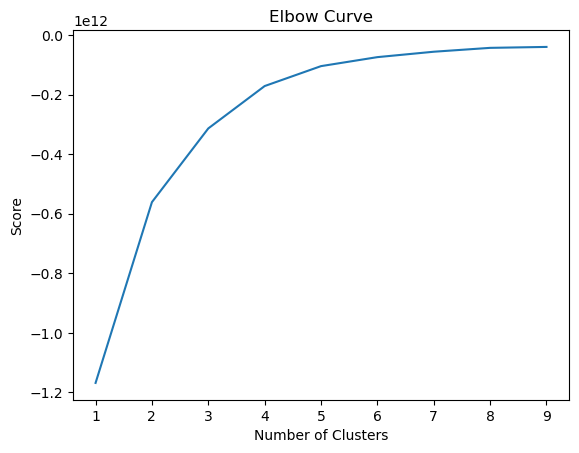

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

here, there's a large jump from 2 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count of clusters is 4

# k-Means Clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=4)

In [19]:
df2['clusters'] = kmeans.fit_predict(df2)

/var/folders/cd/8vl1s70d6dqgshpmc74wr4hw0000gn/T/ipykernel_8365/3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [20]:
df2['clusters'].value_counts()

clusters
3    1073
0     430
2      20
1       3
Name: count, dtype: int64

In [21]:
df2.head(100)

,ranking,number_of_students,international_students%,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score,clusters
0,1,20774,0.41,95.6,91.3,99.6,98.0,68.7,96.4,3
1,2,16223,0.23,94.9,92.2,96.7,99.9,90.1,79.5,3
2,3,21261,0.25,94.8,94.4,98.8,99.4,46.8,77.7,3
3,4,2238,0.33,94.5,92.5,96.9,97.0,92.7,83.6,3
4,5,11276,0.34,94.4,90.7,94.4,99.7,90.4,90.0,3
...,...,...,...,...,...,...,...,...,...,...
95,96,9514,0.09,62.4,64.4,68.1,57.9,100.0,36.6,3
96,97,24880,0.12,62.3,57.1,66.7,66.9,69.5,44.8,3
97,98,35040,0.27,62.1,43.5,47.5,93.5,53.2,72.4,0
98,99,22137,0.05,62.1,42.7,58.3,88.9,37.0,56.1,3


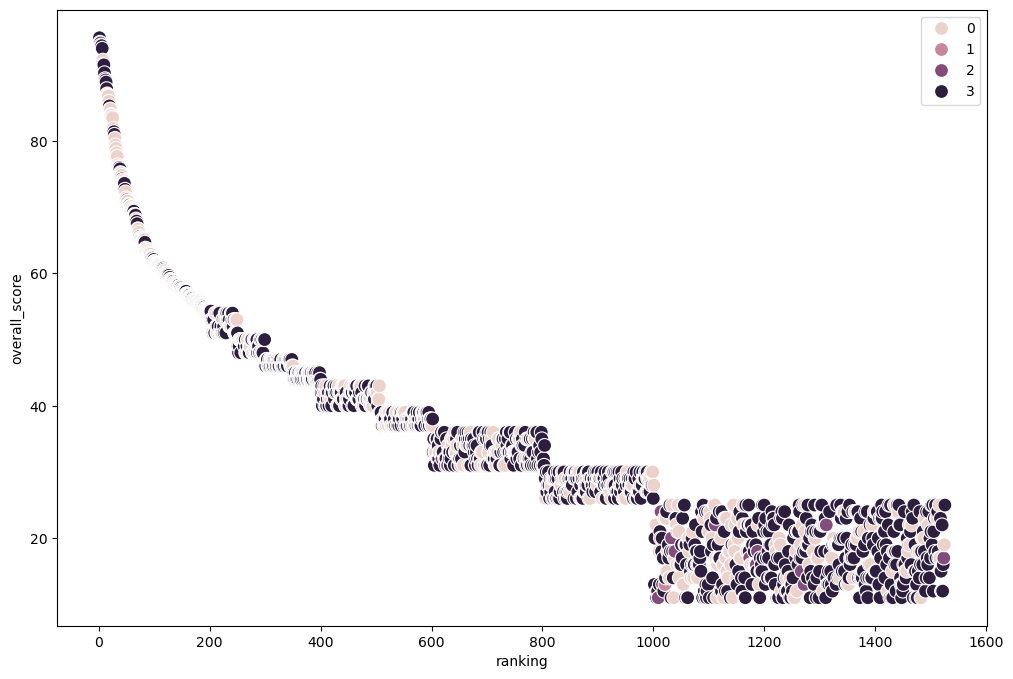

In [22]:
# Plot the clusters for the "ranking" and "overall_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=df['overall_score'], x=df['ranking'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ranking') # Label x-axis.
plt.ylabel('overall_score') # Label y-axis.
plt.show()

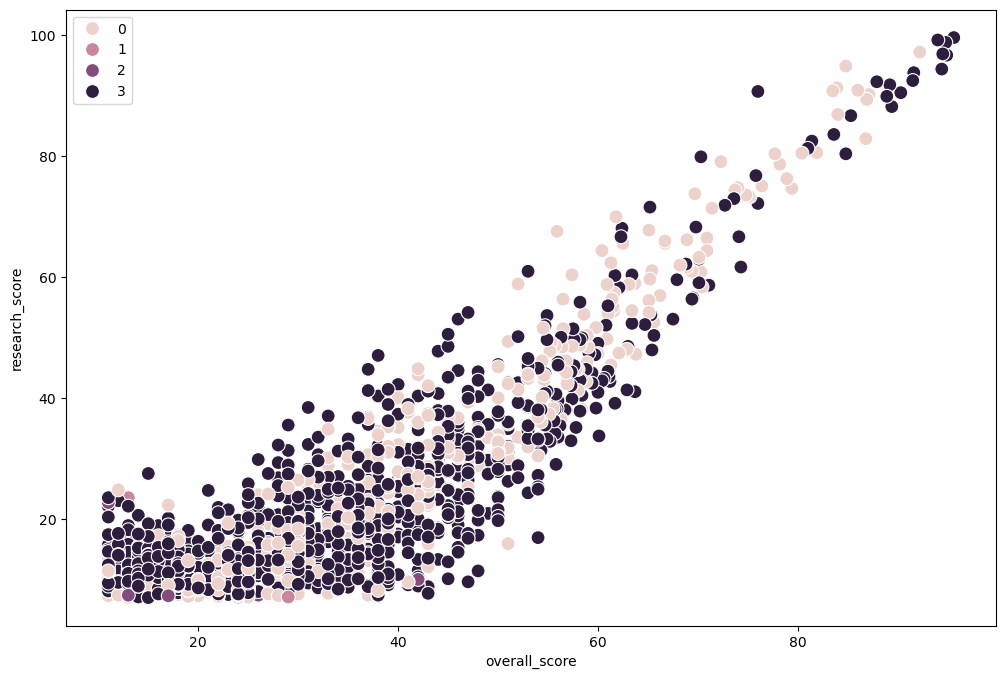

In [23]:
# Plot the clusters for the "research_score" and "overall_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=df['research_score'], x=df['overall_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('overall_score') # Label x-axis.
plt.ylabel('research_score') # Label y-axis.
plt.show()

In [24]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

# Compute the Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df2['clusters'])

print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.2193


the silhoutte score suggests moderate clustering—some overlap may exist between clusters


### Possible Reasons for a Low Silhouette Score
1. **Clusters Overlap**

If the data points are not well-separated, clusters might blend into each other.

Universities might have similar scores across multiple clusters.

2. **Wrong Number of Clusters (k)**

If k is too high, clusters become too small.

If k is too low, different groups get merged.

((i tried different number of clusters ,but the same results appears))

3. **Data Scaling Issues**

K-Means is sensitive to scale—some features (like number_of_students) might dominate the clustering.

Solution: Standardize using StandardScaler() (which i did)

In [27]:
# descriptive statistics for your clusters
df2.groupby('clusters').agg({'number_of_students':['mean', 'median'], 
                         'overall_score':['mean', 'median'], 
                         'research_score':['mean', 'median'],
                          'teaching_score':['mean', 'median'],
                          'citations_score':['mean', 'median'],
                            'ranking':['mean', 'median']})

number_of_students           overall_score        research_score  \
                       mean    median          mean median           mean   
clusters                                                                    
0              39354.565116   35391.5     38.171860   35.0      27.933256   
1             426177.000000  422690.0     20.666667   20.0      12.833333   
2             144052.450000  122507.5     21.800000   19.0      12.690000   
3              13230.054054   12803.0     33.266356   31.0      22.058527   

                teaching_score        citations_score             ranking  \
         median           mean median            mean median         mean   
clusters                                                                    
0         21.45      30.722093  25.55       51.762326  53.45   674.183721   
1          7.70      13.366667  13.50       31.433333  22.70  1005.666667   
2          9.25      18.630000  17.60       36.445000  33.40  1043.450000   
3         16.70      26.856384  23.20       46.935135  42.50   793.397950   

                  
          median  
clusters          
0          638.5  
1         1013.0  
2         1075.5  
3          796.0

In [48]:
# Step 2: Apply K-Means
k = 4  # Adjust as needed
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])

print(f"Silhouette Score after Scaling: {silhouette_avg:.4f}")

Silhouette Score after Scaling: 0.2820
